# **Data Cleaning & Preparation**

## Objectives

This notebook aims to:

1. Clean and prepare the **Cost & Affordability of a Healthy Diet** dataset for analysis.
2. Handle missing values and remove indicators/rows with insufficient data.
3. Filter and reshape key indicators:
   - Cost of a healthy diet (CoHD, PPP dollars per person per day)
   - Prevalence of unaffordability (PUA, %)
   - Food group costs (LCU per person per day, 2021)
4. Detect and visualise outliers in the cost of a healthy diet.
5. Produce test visuals of global cost trends over time.
6. Prepare and run a **linear regression** model (CoHD PPP → PUA).
7. Prepare and run **clustering** on countries using cost, affordability, and food group structure.


## Inputs

- **Raw dataset (CSV):** `data/raw/cost_and_affordability_healthy_diet.csv`

  - Contains:
    - `area`, `area_code`, `item`, `unit`
    - Yearly values: `y2017` … `y2024`
    - Forecast/flag columns: `y2017f` … `y2024f`

- **Python libraries:**
  - `pandas`, `numpy`
  - `matplotlib`, `seaborn`
  - `plotly.express`
  - `scikit-learn` (LinearRegression, KMeans, StandardScaler)
  
## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/Cost-and-Affordability-of-a-Healthy-Diet-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
import os
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/Cost-and-Affordability-of-a-Healthy-Diet-Analysis'

# Setup/Extraction

The setup or extraction section outlines the initial procedures for preparing the notebook for primary analysis, including configuring the environment, importing required libraries, and loading raw data from a CSV file.

## 1. Environment Configuration

In [4]:

# Import necessary libraries for the project
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.3f}".format
sns.set_theme(style='whitegrid')

## 2. Dataset Loading

In [5]:
# Load the raw dataset from a CSV file
data_path = "/Users/muhtarmuhtar/Documents/vscode-projects/Cost-and-Affordability-of-a-Healthy-Diet-Analysis/data/raw/Cost_Affordability_Healthy_Diet.csv" 
df_raw = pd.read_csv(data_path) 
print(f"Shape: {df_raw.shape}")  # Display the shape of the dataset
df_raw.head() # Display the first few rows of the dataset

Shape: (3579, 26)


,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Release Code,Release,Unit,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F,Y2023,Y2023F,Y2024,Y2024F
0,2,'004,Afghanistan,7005,"Prevalence of unaffordability (PUA), percent",6121,Value,12U2024,December 2024 (Update),%,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,NaN,NaN,NaN
1,2,'004,Afghanistan,7006,Number of people unable to afford a healthy di...,6132,Value,12U2024,December 2024 (Update),million No,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,NaN,NaN,NaN
2,3,'008,Albania,70041,"Cost of a healthy diet (CoHD), LCU per person ...",6205,Value,7S2025,July 2025 (SOFI report),LCU/cap/d,160.41,E,164.71,E,169.51,E,175.63,E,182.48,E,203.92,E,223.17,E,230.79,E
3,3,'008,Albania,70040,"Cost of a healthy diet (CoHD), PPP dollar per ...",6226,Value,7S2025,July 2025 (SOFI report),Int$ (PPP) per person per day,3.04,E,3.13,E,3.32,E,3.4,E,3.49,E,4.14,E,4.58,E,4.77,E
4,3,'008,Albania,70071,"Cost of starchy staples, LCU per person per day",6205,Value,7S2025,July 2025 (SOFI report),LCU/cap/d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.81,E,NaN,NaN,NaN,NaN,NaN,NaN


---

# Transformation & Cleaning

The transformation section involves cleaning, structuring, and enriching the raw data obtained during the setup or extraction phase to prepare it for subsequent analysis, modeling, or visualization.

## 1. Dataset Overview

In [6]:
# Info about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area Code        3579 non-null   int64 
 1   Area Code (M49)  3579 non-null   object
 2   Area             3579 non-null   object
 3   Item Code        3579 non-null   int64 
 4   Item             3579 non-null   object
 5   Element Code     3579 non-null   int64 
 6   Element          3579 non-null   object
 7   Release Code     3579 non-null   object
 8   Release          3579 non-null   object
 9   Unit             3579 non-null   object
 10  Y2017            1131 non-null   object
 11  Y2017F           1281 non-null   object
 12  Y2018            1112 non-null   object
 13  Y2018F           1281 non-null   object
 14  Y2019            1112 non-null   object
 15  Y2019F           1281 non-null   object
 16  Y2020            1112 non-null   object
 17  Y2020F           1281 non-null   

In [7]:
# Statistical summary of the dataset (transposed for better readability)
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Area Code,3579.000,NaN,NaN,NaN,660.650,1638.848,1.000,70.000,138.000,215.000,9011.000
Area Code (M49),3579,247,'496,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,3579,247,Mongolia,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Code,3579.000,NaN,NaN,NaN,54259.792,27352.173,7005.000,7006.000,70080.000,70101.000,70121.000
Item,3579,16,"Prevalence of unaffordability (PUA), percent",449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Element Code,3579.000,NaN,NaN,NaN,6193.847,40.115,6121.000,6132.000,6205.000,6226.000,6226.000
Element,3579,1,Value,3579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Code,3579,2,7S2025,3097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release,3579,2,July 2025 (SOFI report),3097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,3579,4,Int$ (PPP) per person per day,1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Missing values in each column in descending order
df_raw.isnull().sum().sort_values(ascending=False)

Y2024              2839
Y2023              2835
Y2024F             2780
Y2023F             2780
Y2018              2467
Y2022              2467
Y2020              2467
Y2019              2467
Y2017              2448
Y2022F             2298
Y2020F             2298
Y2019F             2298
Y2018F             2298
Y2017F             2298
Y2021               267
Area Code (M49)       0
Unit                  0
Release               0
Release Code          0
Y2021F                0
Element               0
Element Code          0
Item                  0
Item Code             0
Area                  0
Area Code             0
dtype: int64

In [9]:
# The number of unique values in each column
df_raw.nunique()

Area Code           247
Area Code (M49)     247
Area                247
Item Code            16
Item                 16
Element Code          4
Element               1
Release Code          2
Release               2
Unit                  4
Y2017               647
Y2017F                2
Y2018               670
Y2018F                3
Y2019               655
Y2019F                3
Y2020               686
Y2020F                3
Y2021              1334
Y2021F                3
Y2022               677
Y2022F                3
Y2023               546
Y2023F                3
Y2024               525
Y2024F                3
dtype: int64

## 2. Enhancing Data Consistency: Column Naming and Missing Values

In [10]:
# Create a copy of the raw dataset for cleaning and transformations
df = df_raw.copy()  

### 2.1 Standardise Column Names & Inspect Missing Values Structure

In [11]:
# Standardise column names for consistency and ease of use
df.columns = (
    df.columns
      .str.strip() # Remove leading/trailing whitespace
      .str.lower() # Convert to lowercase
      .str.replace(" ", "_") # Replace spaces with underscores
      .str.replace("-", "_") # Replace hyphens with underscores
)
print(f"Column names: {df.columns}")
df.head()

Column names: Index(['area_code', 'area_code_(m49)', 'area', 'item_code', 'item',
       'element_code', 'element', 'release_code', 'release', 'unit', 'y2017',
       'y2017f', 'y2018', 'y2018f', 'y2019', 'y2019f', 'y2020', 'y2020f',
       'y2021', 'y2021f', 'y2022', 'y2022f', 'y2023', 'y2023f', 'y2024',
       'y2024f'],
      dtype='object')


,area_code,area_code_(m49),area,item_code,item,element_code,element,release_code,release,unit,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f,y2021,y2021f,y2022,y2022f,y2023,y2023f,y2024,y2024f
0,2,'004,Afghanistan,7005,"Prevalence of unaffordability (PUA), percent",6121,Value,12U2024,December 2024 (Update),%,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,NaN,NaN,NaN
1,2,'004,Afghanistan,7006,Number of people unable to afford a healthy di...,6132,Value,12U2024,December 2024 (Update),million No,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,O,NaN,NaN,NaN,NaN
2,3,'008,Albania,70041,"Cost of a healthy diet (CoHD), LCU per person ...",6205,Value,7S2025,July 2025 (SOFI report),LCU/cap/d,160.41,E,164.71,E,169.51,E,175.63,E,182.48,E,203.92,E,223.17,E,230.79,E
3,3,'008,Albania,70040,"Cost of a healthy diet (CoHD), PPP dollar per ...",6226,Value,7S2025,July 2025 (SOFI report),Int$ (PPP) per person per day,3.04,E,3.13,E,3.32,E,3.4,E,3.49,E,4.14,E,4.58,E,4.77,E
4,3,'008,Albania,70071,"Cost of starchy staples, LCU per person per day",6205,Value,7S2025,July 2025 (SOFI report),LCU/cap/d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.81,E,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Percentage of missing values in each column
percentage_missing = (df.isnull()
                    .mean()
                    .sort_values(ascending=False)
                    .mul(100)
                    .to_frame(name="Missing %"))

percentage_missing

,Missing %
y2024,79.324
y2023,79.212
y2024f,77.675
y2023f,77.675
y2018,68.930
y2022,68.930
y2020,68.930
y2019,68.930
y2017,68.399
y2022f,64.208


### 2.2 Identify Year Columns

The dataset contains:
- Year value columns (`y2017`, `y2018`, …, `y2024`)
- Forecast/flag columns (`y2017f`, `y2018f`, …, `y2024f`), which we will drop.

In [13]:
# Identify year columns in the dataset
year_cols = [col for col in df.columns if col.startswith("y")]
print(f"Year columns: {year_cols} \n")

# Identify forecast year columns
forecast_cols = [col for col in df.columns if col.endswith("f")]
print(f"forecast_cols: {forecast_cols} \n")

# Identify actual year columns (non-forecast)
actual_year_cols = [col for col in year_cols if col not in forecast_cols]
print(f"actual_year_cols: {actual_year_cols} \n")

# Convert actual year columns to numeric, coercing errors to NaN
df[actual_year_cols] = df[actual_year_cols].apply(pd.to_numeric, errors='coerce')
print(df[actual_year_cols].dtypes)

Year columns: ['y2017', 'y2017f', 'y2018', 'y2018f', 'y2019', 'y2019f', 'y2020', 'y2020f', 'y2021', 'y2021f', 'y2022', 'y2022f', 'y2023', 'y2023f', 'y2024', 'y2024f'] 

forecast_cols: ['y2017f', 'y2018f', 'y2019f', 'y2020f', 'y2021f', 'y2022f', 'y2023f', 'y2024f'] 

actual_year_cols: ['y2017', 'y2018', 'y2019', 'y2020', 'y2021', 'y2022', 'y2023', 'y2024'] 

y2017    float64
y2018    float64
y2019    float64
y2020    float64
y2021    float64
y2022    float64
y2023    float64
y2024    float64
dtype: object


### 2.3 Drop Forecast and Unnecessary Columns & Convert Years to Numeric

The `y20XXf` columns are flags/estimation codes, not numeric values, so we remove them and ensure all year columns are numeric. We also drop any unnecessary columns that do not contribute to our analysis.

In [14]:
# Drop forecast columns
df.drop(columns=forecast_cols, inplace=True)
print(f"Shape after dropping forecast columns: {df.shape}")

# Drop unnecessary columns in the dataset 
drop_cols = [
    "area_code",
    "item_code",
    "element_code",
    "release_code", 
    "release"
]

df.drop(columns=drop_cols, inplace=True)

print(f"Shape after dropping unnecessary columns: {df.shape}")
df.head()

Shape after dropping forecast columns: (3579, 18)
Shape after dropping unnecessary columns: (3579, 13)


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
0,'004,Afghanistan,"Prevalence of unaffordability (PUA), percent",Value,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'004,Afghanistan,Number of people unable to afford a healthy di...,Value,million No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'008,Albania,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,160.410,164.710,169.510,175.630,182.480,203.920,223.170,230.790
3,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.040,3.130,3.320,3.400,3.490,4.140,4.580,4.770
4,'008,Albania,"Cost of starchy staples, LCU per person per day",Value,LCU/cap/d,NaN,NaN,NaN,NaN,24.810,NaN,NaN,NaN


### 2.4 Handle Missing Values

#### Strategy:
1. **Remove indicators (`item`) with no usable numeric values** across all year columns.  
2. **Drop rows with >50% missing** across year columns.

In [15]:
#2.4.1 Find and remove indicators that have at least one non-null numeric value across all years
indicator_has_data = (
    df.groupby("item")[actual_year_cols]
      .apply(lambda x: x.notna().any().any())
)

valid_items = indicator_has_data[indicator_has_data].index

df = df[df["item"].isin(valid_items)].reset_index(drop=True)
print("Rows after removing empty indicators:", len(df))

Rows after removing empty indicators: 3579


In [16]:
# 2.4.2 Function to drop rows where more than 50% of year columns are missing
def filter_missing_rows(df, actual_year_cols, threshold=0.5):
    """
    Retrun a DataFrame with rows dropped where the fraction of missing values
    across specified year columns exceeds the given threshold.
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame to filter.
    actual_year_cols : list
        List of columns representing actual years to check for missing values.
    threshold : float, optional
        The maximum allowed fraction of missing values per row (default is 0.5).
    
    Returns:
    --------
    pd.DataFrame
        The filtered DataFrame with rows dropped where the fraction of missing values
        across specified year columns exceeds the given threshold.
    """
    # 1) For each row, compute the fraction of NaNs across the year columns
    missing_fraction = df[actual_year_cols].isna().mean(axis=1)

    # 2) Keep only rows where that fraction is <= threshold
    return df.loc[missing_fraction <= threshold].reset_index(drop=True)

# Record number of rows before filtering
rows_before = len(df)

# Apply filtering
df_filtered = filter_missing_rows(df, actual_year_cols, threshold=0.5)

# Assign filtered dataframe back to df
df = df_filtered

# Print summary
print(f"Rows before filtering: {rows_before}")
print(f"Rows after filtering: {len(df)}")
print(f"Rows dropped: {rows_before - len(df)}")

Rows before filtering: 3579
Rows after filtering: 1086
Rows dropped: 2493


## 3. Filter Relevant Indicators

The analysis focuses on the following variables:

- **CoHD PPP:** `Cost of a healthy diet (CoHD), PPP dollar per person per day`  
- **PUA:** `Prevalence of unaffordability (PUA), percent`  
- **Food group costs (LCU):** starchy staples, animal-source foods, legumes, vegetables, fruits, fats & oils.

In [17]:

# Filter key indicator groups (CoHD PPP, PUA, food-group costs)

def filter_by_item_contains(df, pattern, case_sensitive=False):
    """
    Return a copy of rows where the 'item' column contains the given pattern.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe that must contain an 'item' column.
    pattern : str
        Substring to look for inside 'item'.
    case_sensitive : bool, optional
        If False, match ignoring case. Defaults to False.

    Returns
    -------
    pandas.DataFrame
        Filtered dataframe with matching rows only.
    """
    if not case_sensitive:
        mask = df["item"].str.lower().str.contains(pattern.lower(), na=False, regex=False)
    else:
        mask = df["item"].str.contains(pattern, na=False, regex=False)

    result = df.loc[mask].copy()
    print(f"[filter_by_item_contains] '{pattern}' → {mask.sum()} rows selected")
    return result


# 3.1 CoHD PPP rows
cohd_pattern = "Cost of a healthy diet (CoHD), PPP dollar per person per day"
df_cohd = filter_by_item_contains(df, cohd_pattern)

# 3.2 PUA rows
pua_pattern = "Prevalence of unaffordability (PUA), percent"
df_pua = filter_by_item_contains(df, pua_pattern)

# 3.3 Food group cost indicators (LCU)
food_pattern = "LCU per person per day"
df_food = filter_by_item_contains(df, food_pattern)

# Display samples of the filtered datasets
print("\nCoHD sample:")
display(df_cohd.head())

print("\nPUA sample:")
display(df_pua.head())

print("\nFood group cost sample:")
display(df_food.head())

[filter_by_item_contains] 'Cost of a healthy diet (CoHD), PPP dollar per person per day' → 205 rows selected
[filter_by_item_contains] 'Prevalence of unaffordability (PUA), percent' → 365 rows selected
[filter_by_item_contains] 'LCU per person per day' → 171 rows selected

CoHD sample:


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
1,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.040,3.130,3.320,3.400,3.490,4.140,4.580,4.770
7,'012,Algeria,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,4.100,4.160,4.180,4.190,4.470,5.010,5.410,5.530
13,'024,Angola,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.180,3.270,3.430,3.700,4.110,4.550,4.720,5.000
19,'028,Antigua and Barbuda,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.770,4.240,4.380,4.670,4.920,5.460,5.800,5.900
21,'051,Armenia,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.220,3.310,3.440,3.540,3.800,4.270,4.330,4.350



PUA sample:


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
2,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.600,14.600,13.900,12.600,11.700,11.400,10.700
3,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.500,15.300,14.100,12.600,12.200,NaN,NaN
8,'012,Algeria,"Prevalence of unaffordability (PUA), percent",Value,%,18.800,18.100,17.500,19.200,19.600,20.500,21.100,20.200
9,'012,Algeria,"Prevalence of unaffordability (PUA), percent",Value,%,18.500,17.800,17.100,18.900,19.300,20.200,NaN,NaN
14,'024,Angola,"Prevalence of unaffordability (PUA), percent",Value,%,60.700,63.200,64.200,68.100,69.800,70.500,70.800,71.400



Food group cost sample:


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
0,'008,Albania,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,160.410,164.710,169.510,175.630,182.480,203.920,223.170,230.790
6,'012,Algeria,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,155.330,160.560,159.700,160.010,176.080,199.700,226.230,233.640
12,'024,Angola,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,368.840,427.540,498.120,633.060,836.220,1041.360,1178.310,1554.610
18,'028,Antigua and Barbuda,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,9.730,10.050,10.200,10.420,10.540,11.650,12.480,13.120
20,'051,Armenia,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,536.780,549.330,559.370,561.120,624.400,705.330,701.230,685.100


## 4. Reshape CoHD PPP & PUA to Long Format 

The wide-year columns (`y2017` to `y2024`) are transformed into a long, tidy format.

Two datasets are reshaped as follows:
- `area`, `year`, `cohd_ppp`
- `area`, `year`, `pua`

In [18]:
#4.1 CoHD PPP Long Format
cohd_long = df_cohd.melt(
    id_vars=["area_code_(m49)", "area", "item", "unit"],
    value_vars=actual_year_cols,
    var_name="year",
    value_name="cohd_ppp"
)

# Clean 'year' column and drop rows with missing CoHD PPP values
cohd_long["year"] = cohd_long["year"].str.replace("y", "").astype(int)
cohd_long = cohd_long.dropna(subset=["cohd_ppp"]).reset_index(drop=True)

# Display results
print(f"CoHD PPP long format: {len(cohd_long)} rows")
print("\nCoHD sample:")
display(cohd_long.head())

#4.2 PUA Long Format
pua_long = df_pua.melt(
    id_vars=["area_code_(m49)", "area", "item", "unit"],
    value_vars=actual_year_cols,
    var_name="year",
    value_name="pua_ppp"
)

# Clean 'year' column and drop rows with missing PUA values
pua_long["year"] = pua_long["year"].str.replace("y", "").astype(int)
pua_long = pua_long.dropna(subset=["pua_ppp"]).reset_index(drop=True)

# Rename column for consistency
pua_long.rename(columns={"pua_ppp": "pua"}, inplace=True)

# Display results
print(f"PUA long format: {len(pua_long)} rows")
print("\nPUA sample:")
display(pua_long.head())

CoHD PPP long format: 1639 rows

CoHD sample:


,area_code_(m49),area,item,unit,year,cohd_ppp
0,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.040
1,'012,Algeria,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,4.100
2,'024,Angola,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.180
3,'028,Antigua and Barbuda,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.770
4,'051,Armenia,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.220


PUA long format: 2555 rows

PUA sample:


,area_code_(m49),area,item,unit,year,pua
0,'008,Albania,"Prevalence of unaffordability (PUA), percent",%,2017,24.300
1,'008,Albania,"Prevalence of unaffordability (PUA), percent",%,2017,24.300
2,'012,Algeria,"Prevalence of unaffordability (PUA), percent",%,2017,18.800
3,'012,Algeria,"Prevalence of unaffordability (PUA), percent",%,2017,18.500
4,'024,Angola,"Prevalence of unaffordability (PUA), percent",%,2017,60.700


## 5. Merge CoHD PPP & PUA for Analysis & Regression

We create a dataset with one row for each `area` and `year`, which includes both:

- `cohd_ppp` – cost of a healthy diet (PPP)  
- `pua` – prevalence of unaffordability (%)

This dataset will be used for regression analysis.

In [44]:
# Merge datasets for regression analysis
df_lr = cohd_long.merge(
    pua_long[["area", "year", "pua"]],
    on=["area", "year"],
    how="inner"
)

print(f"Merged dataset: {len(df_lr)} rows")
print("\nMerged sample:")
display(df_lr.head())

Merged dataset: 2517 rows

Merged sample:


,area_code_(m49),area,item,unit,year,cohd_ppp,pua
0,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.040,24.300
1,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.040,24.300
2,'012,Algeria,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,4.100,18.800
3,'012,Algeria,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,4.100,18.500
4,'024,Angola,"Cost of a healthy diet (CoHD), PPP dollar per ...",Int$ (PPP) per person per day,2017,3.180,60.700


## 6. Clustering Preparation

We prepare a dataset to cluster countries based on the following variables:

- CoHD PPP (cost)  
- PUA (%) (affordability)  
- Food group costs (LCU per person per day, 2021)

We will:

1. Pivot the 2021 food group costs to a wide format, with one row per area.
2. Merge the data with 2021 CoHD PPP and PUA values.
3. Address any remaining missing values.

In [48]:
# Prepare food group cost data for 2021
df_food_2021 = df_food[["area", "item", "y2021"]].copy()
df_food_2021.rename(columns={"y2021": "cost_2021"})

display(df_food_2021)
# Pivot food group costs to wide format
# food_wide_2021 = df_food_2021.pivot(
#     index="area",
#     columns="item",
#     values="cost_2021"
# ).reset_index()

# food_wide_2021
# print(f"Food group costs wide format: {len(food_wide_2021)} rows")

,area,item,y2021
0,Albania,"Cost of a healthy diet (CoHD), LCU per person ...",182.480
6,Algeria,"Cost of a healthy diet (CoHD), LCU per person ...",176.080
12,Angola,"Cost of a healthy diet (CoHD), LCU per person ...",836.220
18,Antigua and Barbuda,"Cost of a healthy diet (CoHD), LCU per person ...",10.540
20,Armenia,"Cost of a healthy diet (CoHD), LCU per person ...",624.400
...,...,...,...
881,United States of America,"Cost of a healthy diet (CoHD), LCU per person ...",2.360
887,Uruguay,"Cost of a healthy diet (CoHD), LCU per person ...",102.200
893,Uzbekistan,"Cost of a healthy diet (CoHD), LCU per person ...",11788.000
899,Viet Nam,"Cost of a healthy diet (CoHD), LCU per person ...",29140.600


## 7. Outlier Detection (Numeric & Visual)

We focus on **2021** for detecting outliers in `cohd_ppp`:

- Identifying numeric outliers using the Interquartile Range (IQR) 
- Analysing visual outliers through a boxplot and histogram.

<div class="alert alert-block alert-info"> <b>NOTE</b> Year 2021 is chosen as it has the most complete data across countries.
</div>

In [ ]:
# 7.1 Numeric Outliers 
# Filter for year 2021 and drop rows with missing values in either column
df_lr_2021 = df_lr[df_lr["year"] == 2021].dropna(subset=["cohd_ppp", "pua"]).copy()

# Extract CoHD PPP for 2021
cohd_2021 = df_lr_2021["cohd_ppp"]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = cohd_2021.quantile(0.25)
Q3 = cohd_2021.quantile(0.75)
IQR = Q3 - Q1

# 1.5*IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the 1.5*IQR rule
outliers = df_lr_2021[(cohd_2021 < lower_bound) | (cohd_2021 > upper_bound)] 
print(f"Number of outliers in CoHD PPP for 2021: {len(outliers)}")
outliers[["area", "cohd_ppp"]].head()

Number of outliers in CoHD PPP for 2021: 15


,area,cohd_ppp
1460,Bhutan,5.140
1461,Bhutan,5.140
1547,Guyana,5.900
1548,Guyana,5.900
1573,Japan,5.980


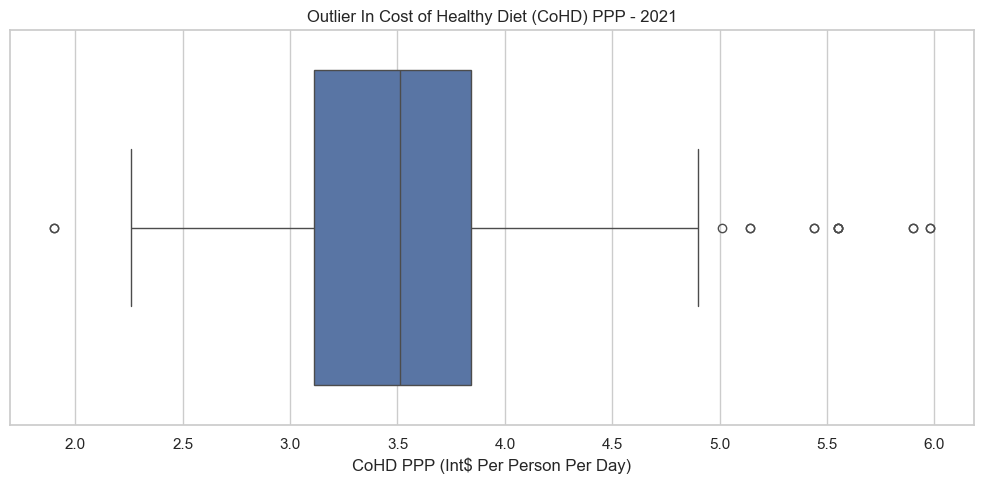

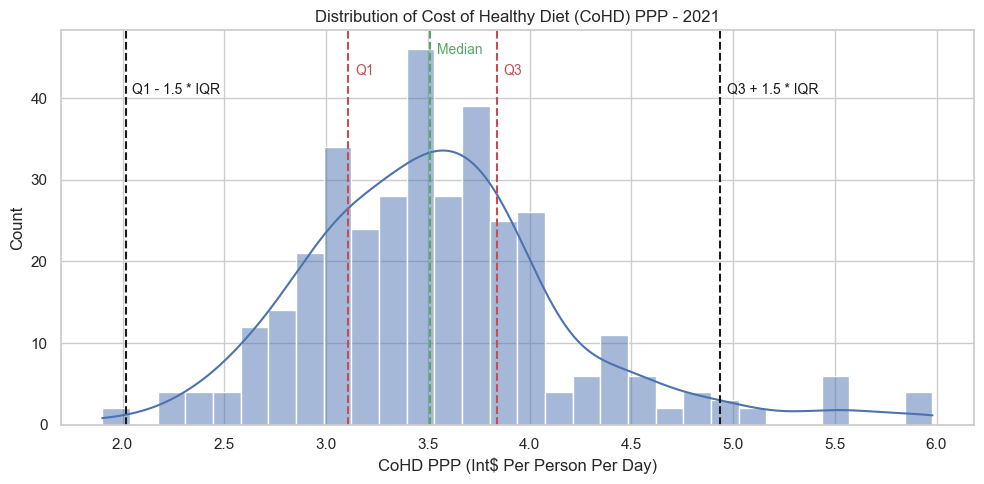

In [ ]:
# 7.2 Visual Outliers
# 7.2.1 Boxplot to visualise outliers in CoHD PPP for 2021
fig, axes = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_lr_2021, x="cohd_ppp", ax=axes)
plt.title("Outlier In Cost of Healthy Diet (CoHD) PPP - 2021")
plt.xlabel("CoHD PPP (Int$ Per Person Per Day)")

plt.tight_layout()
plt.show()

# 7.2.2 Histogram with statistical lines for CoHD PPP in 2021
fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(data=df_lr_2021, x="cohd_ppp", bins=30, kde=True)
plt.title("Distribution of Cost of Healthy Diet (CoHD) PPP - 2021")
plt.xlabel("CoHD PPP (Int$ Per Person Per Day)")

# reuse the same axis object created by seaborn/matplotlib
x_offset = df_lr_2021["cohd_ppp"].std() * 0.05  # adjust if needed

# Create a green dashed line for the median
plt.axvline(df_lr_2021["cohd_ppp"].median(), color="g", linestyle="--", linewidth=1.5)
plt.text(
    df_lr_2021["cohd_ppp"].median() + x_offset,
    axes.get_ylim()[1] * 0.95,
    s="Median",
    color="g",
    fontsize=10,
    ha="left",
    va="center",
)

# Create red dashed lines for Q1
plt.axvline(Q1, color="r", linestyle="--", linewidth=1.5)
plt.text(
    Q1 + x_offset, 
    axes.get_ylim()[1] * 0.90, 
    s="Q1", 
    color="r", 
    fontsize=10, 
    ha="left", 
    va="center"
)

# Create black dashed lines for lower bound
plt.axvline(lower_bound, color="k", linestyle="--", linewidth=1.5)
plt.text(
    lower_bound + x_offset, 
    axes.get_ylim()[1] * 0.85, 
    s="Q1 - 1.5 * IQR", 
    color="k", 
    fontsize=10, 
    ha="left", 
    va="center"
)

# Create red dashed lines for Q3
plt.axvline(Q3, color="r", linestyle="--", linewidth=1.5)
plt.text(
    Q3 + x_offset, 
    axes.get_ylim()[1] * 0.90, 
    s="Q3", 
    color="r", 
    fontsize=10, 
    ha="left", 
    va="center"
)
# Create black dashed lines for upper bound
plt.axvline(upper_bound, color="k", linestyle="--", linewidth=1.5)
plt.text(
    upper_bound + x_offset, 
    axes.get_ylim()[1] * 0.85, 
    s="Q3 + 1.5 * IQR", 
    color="k", 
    fontsize=10, 
    ha="left", 
    va="center"
)

plt.tight_layout()
plt.show()

In [22]:
# Inspect the actual food‑group item names
for it in df["item"].unique():
    if "Cost of" in it and "LCU per person per day" in it:
        print(it)


Cost of a healthy diet (CoHD), LCU per person per day


In [23]:
print(df.shape)
df.head()

(1086, 13)


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
0,'008,Albania,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,160.410,164.710,169.510,175.630,182.480,203.920,223.170,230.790
1,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.040,3.130,3.320,3.400,3.490,4.140,4.580,4.770
2,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.600,14.600,13.900,12.600,11.700,11.400,10.700
3,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.500,15.300,14.100,12.600,12.200,NaN,NaN
4,'008,Albania,Number of people unable to afford a healthy di...,Value,million No,0.700,0.500,0.400,0.400,0.400,0.300,0.300,0.300


In [24]:

# Inspect the actual food‑group item names
for it in df["item"].unique():
    if "Cost of" in it and "LCU per person per day" in it:
        print(it)

Cost of a healthy diet (CoHD), LCU per person per day


In [25]:
# # Select rows where the "item" column equals the requested indicator and print the year columns.
# mask = df['item'] == 'Prevalence of unaffordability (PUA), percent'

# # Use existing actual_year_cols if available, otherwise fallback to any columns starting with 'y'
# year_cols_to_show = actual_year_cols if 'actual_year_cols' in globals() else [c for c in df.columns if str(c).startswith('y')]

# subset = df.loc[mask, year_cols_to_show]

# if subset.empty:
# 	print("No rows found for item 'Prevalence of unaffordability (PUA), percent'")
# else:
# 	print(subset)

In [26]:
print(df.shape)
df.head()

(1086, 13)


,area_code_(m49),area,item,element,unit,y2017,y2018,y2019,y2020,y2021,y2022,y2023,y2024
0,'008,Albania,"Cost of a healthy diet (CoHD), LCU per person ...",Value,LCU/cap/d,160.410,164.710,169.510,175.630,182.480,203.920,223.170,230.790
1,'008,Albania,"Cost of a healthy diet (CoHD), PPP dollar per ...",Value,Int$ (PPP) per person per day,3.040,3.130,3.320,3.400,3.490,4.140,4.580,4.770
2,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.600,14.600,13.900,12.600,11.700,11.400,10.700
3,'008,Albania,"Prevalence of unaffordability (PUA), percent",Value,%,24.300,17.500,15.300,14.100,12.600,12.200,NaN,NaN
4,'008,Albania,Number of people unable to afford a healthy di...,Value,million No,0.700,0.500,0.400,0.400,0.400,0.300,0.300,0.300


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [27]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
